7.2.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

logins = pd.read_csv("../datasets/customer_logins.csv")
logins["month"] = pd.to_datetime(logins["month"], format="%Y-%m-%d")
print(logins.head())

   customer_id         region      month  login_days
0           93         Europe 2020-01-01          21
1          346         Europe 2020-01-01          12
2          404           Asia 2020-01-01          22
3          347  North America 2020-01-01          15
4          403           Asia 2020-01-01          30


Text(0, 0.5, '# of Rrecords')

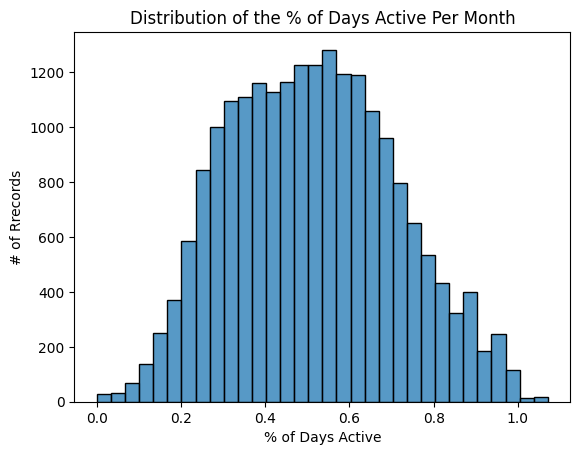

In [2]:
logins["n_days"] = logins["month"].dt.days_in_month
logins["login_days_pct"] = logins["login_days"]/logins["n_days"]

sns.histplot(x=logins["login_days_pct"], bins=32)
plt.title("Distribution of the % of Days Active Per Month")
plt.xlabel("% of Days Active")
plt.ylabel("# of Rrecords")

<Axes: xlabel='login_days', ylabel='Count'>

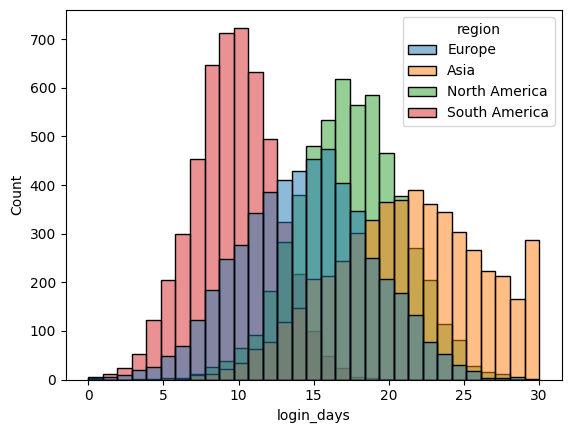

In [3]:
sns.histplot(x=logins["login_days"], hue=logins["region"], bins=31)  #A

Text(0.5, 1.0, 'Average % of Monthly Active Days Over Time')

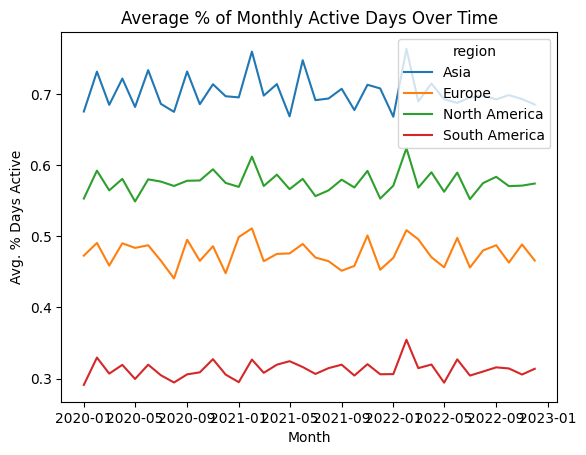

In [4]:
avg_logins = (
    logins.groupby(["month", "region"])["login_days_pct"].mean().reset_index()
)

sns.lineplot(
    x="month",
    y="login_days_pct",
    hue="region",
    data=avg_logins
)

plt.xlabel("Month")
plt.ylabel("Avg. % Days Active")
plt.title("Average % of Monthly Active Days Over Time")

Text(0.5, 1.0, 'Avergae % of Monthly Active by Month and Year')

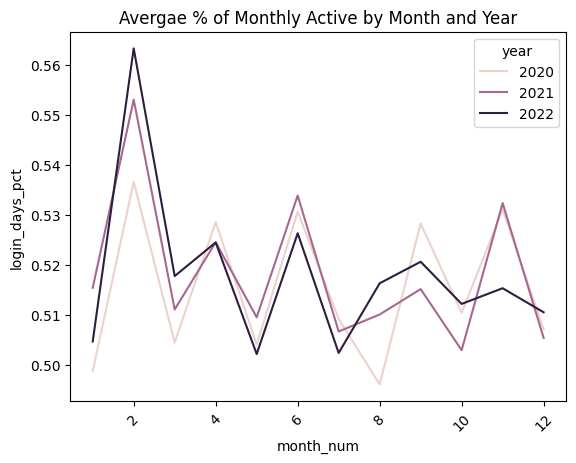

In [5]:
logins["month_num"] = (logins["month"].dt.month)
logins["year"] = (logins["month"].dt.year)

avg_logins_m = (
    logins.groupby(["year", "month_num"])["login_days_pct"].mean().reset_index()
)

sns.lineplot(
    x="month_num",
    y="login_days_pct",
    hue="year",
    data=avg_logins_m
)

plt.xticks(rotation=45)
plt.title("Avergae % of Monthly Active by Month and Year")